1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
win = pd.read_csv("data/usuarios_win_mac_lin.csv")
win.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
win.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [5]:
win_no1 = win[~(win["clase"] == 1)]
win_no1.clase.unique()

array([2, 0], dtype=int64)

In [6]:
X = win_no1.iloc[:, :-1]
y = win_no1.clase

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train = np.where(y_train==2, 1, y_train)
y_test = np.where(y_test==2, 1, y_test)

In [104]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [105]:
model = LogisticRegression()

In [106]:
model.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = model.predict(X_test)

In [108]:
y_test.tolist()

[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]

In [109]:
y_pred.tolist()

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]

In [110]:
df_pred = pd.DataFrame({"clase":y_test, "prediction": y_pred})
df_pred["acierto"] = np.where(df_pred["clase"] == df_pred["prediction"], True, False)

In [111]:
df_pred

,clase,prediction,acierto
0,1,0,False
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,1,1,True
6,0,0,True
7,1,1,True
8,1,0,False
9,1,1,True


In [112]:
con_fun = confusion_matrix(y_test, y_pred)
con_fun

array([[14,  0],
       [ 3,  9]], dtype=int64)

<AxesSubplot: >

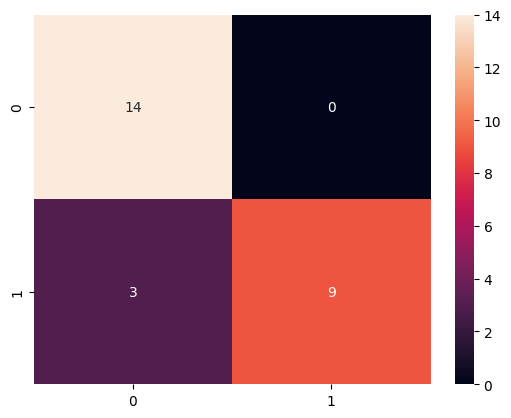

In [113]:
sns.heatmap(con_fun, annot=True)

In [114]:
print(f"El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.\nPor este motivo para este modelo:\nEl score es: {model.score(X_test, y_test)} y \nel accuracy_score es {accuracy_score(y_test, y_pred)}")


El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.
Por este motivo para este modelo:
El score es: 0.8846153846153846 y 
el accuracy_score es 0.8846153846153846


In [115]:
from sklearn.metrics import f1_score

y_test_2 = np.where(y_test==2, 1, y_test)
y_pred_2 = np.where(y_pred==2, 1, y_pred)

f1_score(y_test_2, y_pred_2, average='macro')

0.880184331797235

In [116]:
2/(1/1 + 1/0.69)

0.8165680473372781

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.75      0.86        12

    accuracy                           0.88        26
   macro avg       0.91      0.88      0.88        26
weighted avg       0.90      0.88      0.88        26



**LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.**

In [118]:
model_grid = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# parámetros cogidos de esta página
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

LogisticRegression(max_iter=1000000000000000).get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [137]:
clf = GridSearchCV(model_grid, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='f1_macro')

In [138]:

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [139]:
best_clf

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1_macro', verbose=True)

In [140]:
print("tuned hyperparameters >> best parameters <<: ",best_clf.best_params_)
print("accuracy:",best_clf.best_score_)

tuned hyperparameters >> best parameters <<:  {'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy: 0.9095388994476871


In [141]:
best_clf.fit(X_train, y_train)
y_hat_gs = best_clf.predict(X_test)

y_hat_gs_2 = np.where(y_hat_gs == 2, 1, y_hat_gs)
print(classification_report(y_test_2, y_hat_gs_2))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.83      0.91        12

    accuracy                           0.92        26
   macro avg       0.94      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26



In [142]:
confusion_matrix(y_test, y_hat_gs)

array([[14,  0],
       [ 2, 10]], dtype=int64)

In [144]:
y_prob

array([3.55876133e-01, 1.81697873e-07, 5.11622563e-06, 1.47421922e-02,
       1.35979099e-07, 6.35085023e-01, 2.67623876e-12, 9.91416064e-01,
       5.25724087e-01, 8.44340896e-01, 9.99999957e-01, 8.40454866e-17,
       6.36217437e-01, 4.35770787e-19, 2.69433905e-12, 3.57158741e-08,
       9.99568918e-01, 6.13070401e-01, 9.99937910e-01, 1.08532357e-08,
       5.77133310e-04, 9.91183542e-01, 4.32404820e-01, 1.92906844e-15,
       1.22232489e-02, 1.45817413e-45])

In [145]:
from sklearn.metrics import roc_auc_score
y_prob = best_clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_hat_gs, y_test)

0.9375